### Reminder on each Module template: [Module 1 - Introduction to Machine Learning](https://ufl.instructure.com/courses/435230/pages/module-1)

Contains: 
* Module objectives
* List of lectures
* Reading materials
* Activities
* Planned assignments

# Lecture 3 - Linear Regression with Polynomial features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

Let's begin by considering the polynomial curve fitting example in the first chapter of our textbook. Polynomial (linear) regression is a supervised learning algorithm.

<div class="alert alert-info">

**Polynomial Regression** is a type of liner regression that uses a special set of *features* - polynomial features.
</div>

<div class="alert alert-success">
    <b>Step 1 - Input Space</b> 

Suppose we are given a training set comprising of $N$ observations of $\mathbf{x}$, $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$, and its corresponding desired outputs $\mathbf{t} = \left[t_1, t_2, \ldots, t_N\right]^T$, where sample $x_i$ has the desired label $t_i$.

So, we want to learn the *true* function mapping $f$ such that $\mathbf{t}  = f(\mathbf{x}, \mathbf{w})$, where $\mathbf{w}$ are parameters of the model.
</div>

* We generally organize data into *vectors* and *matrices*. Not only is it a common way to organize the data, but it allows us to easily apply linear algebraic operations during analysis. It also makes it much simpler when it comes to code implementation!
    * In engineering textbooks and for our course purposes, **vectors** are defined as *column vectors*. This is why we write $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$.

* Note that both the training data and desired outputs can be noisy.

<div class="alert alert-success">
    <b>Step 2 - Feature Extraction</b> 

For the polynomial regression problem, let's consider *polynomial features* for each data point $x_i$. Let's say we can find these features using a **basis function**, $\phi(\mathbf{x})$. In the *polynomial regression* example, let's consider $\phi(x_i) = \left[x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^{M-1}\right]^T$.
</div>

* Other features can be extracted.

* For all data observations $\{x_i\}_{i=1}^N$ and using the feature space defined as $\phi(x_i) = \left[x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^{M-1}\right]^T$, we can write the input data in a *matrix* form as:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}$$

where each row is a feature representation of a data point $x_i$.

Other **basis functions** include:

* Polynomials Basis functions: $\phi_j(x) = x^j$

* Radial Basis functions: $\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2s^2}\right\}$

* Sigmoidal basis function: $\phi_j(x) = \sigma\left(\frac{x-\mu_j}{s}\right)$, where $\sigma(a)$ is the logistic sigmoid function defined by $\sigma(a)=\frac{1}{1+\exp(-a)}$

* Fourier Basis functions, which leads to an expansion in sinusoidal functions. Each basis function represents a specific frequency and has infinite spatial extent

* Wavelets Basis Functions, representing both space and frequency

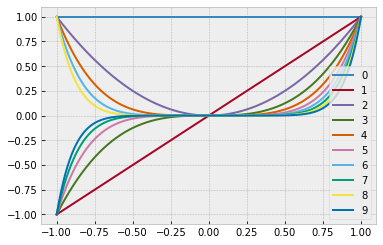

In [2]:
# Polynomial Basis Functions
x=np.linspace(-1,1,1000)
polynomials=np.array([x**i for i in range(10)]).T

plt.plot(x, polynomials)
plt.legend(range(10));

<div class="alert alert-info">
    <b>Feature Space</b> 

The set of features drawn by the transformation 

\begin{align}
\phi: \mathbb{R} & \rightarrow \mathbb{R}^M \\
x & \rightarrow [\phi_1(x), \phi_2(x), ..., \phi_M(x)]
\end{align}
is often called the **feature space**.
When we write a linear regression with respect to a set of basis functions, the regression model is linear in the *feature space*.

$M$ is dimensionality of the feature space and is often called the *model order*.
</div>

* Now, we want to find the mapping from the feature input data $\mathbf{X}$ to the desired output values $\mathbf{t}$.

Suppose the data actually comes from some **unknown hidden function**, that takes in the data points $\mathbf{x}$ with some parameters $\mathbf{w}$ and produces the desired values $\mathbf{t}$, i.e. $\mathbf{t} = f(\mathbf{x},\mathbf{w})$.
* We do not know anything about the function $f$. If we knew the hidden function, we would not need to learn the *mapping* - we would already know it. However, since we do not know the true underlying function, we need to do our best to estimate from the examples of input-output pairs that we have.

<div class="alert alert-success">
    <b>Step 3 - Model Selection or Mapping</b> 

Let's assume that the desired output values are a *linear combination* of the feature input space, i.e., the **polynomial function**

$$t \sim y(x,\mathbf{w}) = w_0x^0 + w_1x^1 + w_2x^2+\cdots+w_Mx^{M-1} = \sum_{j=0}^{M-1} w_jx^j$$
</div>

* This means that for every paired training data point $\{x_i, t_i\}_{i=1}^N$, we can model the output value as 

$$t_i \sim y(x_i,\mathbf{w}) = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+\cdots+w_{M-1}x_i^{M-1} $$

* Although the polynomial function $y(x,\mathbf{w})$ is a nonlinear function of $x$, it is a linear function of the coefficients $\mathbf{w}$. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called *linear models*.

The **linear basis model** for regression takes linear combinations of fixed nonlinear functions of the input variables

$$t \sim y(x,\mathbf{w}) = w_0 + \sum_{j=1}^{M-1} w_j\phi_j(x)$$

where $\phi(x)$ are known as *basis function*.

* The parameter $w_0$ allows for any fixed offset in the data and is sometimes called a *bias* parameter (not to be confused with ‘bias’ in a statistical sense). 

* It is often convenient to define an additional dummy *basis function* $\phi_0(x) = 1$ so that

<div class="alert alert-success">
    <b>Linear Basis Model</b> 

The linear basis model for regression takes linear combinations of fixed nonlinear functions of the input variables
$$t \sim y(x,\mathbf{w}) = \sum_{j=0}^{M-1} w_j\phi_j(x)$$
where $\mathbf{w} = \left[w_{0}, w_{1}, \ldots, w_{M-1}\right]^T$, $\mathbf{\phi} = \left[\phi_{0}, \phi_{1}, \ldots, \phi_{M-1}\right]^T$ and we have a total of $M$ parameters.
</div>

* The example of the **polynomial regression** is a particular example of this model in which there is a single input variable $x$, and the basis functions take the form of powers of $x$ so that $\phi(x)=x^j$. 

The values of the coefficients $\mathbf{w}$ will be determined by *fitting* the polynomial to the training data. 

This can be done by minimizing an **objective function** (also defined as **cost function**, **error function**, or **loss function**) that measures the *misfit* between the function $y(x,\mathbf{w})$, for any given value of $\mathbf{w}$, and the training set data points $\{x_i,t_i\}_{i=1}^N$.

* What is the model's *objective* or goal?

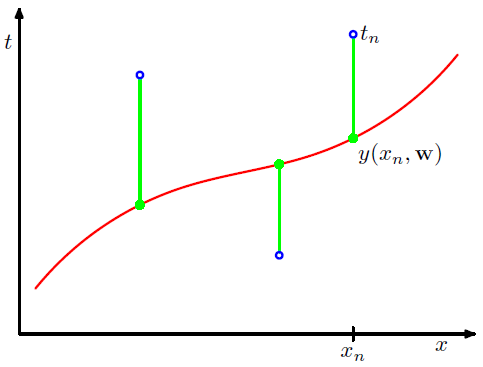

In [4]:
from IPython.display import Image
Image('figures/LeastSquares.png',width=400)

One simple choice for fitting the model is to consider the error function given by the sum of the squares of the errors between the predictions $y(x_i,\mathbf{w})$ for each data point $x_i$ and the corresponding target values $t_i$, so that we minimize

\begin{align*} J(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N \left(t_n - y(x_n,\mathbf{w})\right)^2 \\
&= \frac{1}{2} \sum_{n=1}^N \left(t_n - \sum_{j=0}^{M-1} w_jx_n^j\right)^2
\end{align*}

Other objective functions can be considered, for example, the absolute value of the absolute error is often used for sparsity concerns. But we will come back to this topic and discuss it further.
    
<div class="alert alert-success">
    <b>Step 4 - Objective Function</b> 

This is the measure we want to optimize, that is, minimize (if it is an error function) or maximize if it is a reward function. The objective function can take many forms, for example, the **least squares error** or **mean least squares error**.

$$J(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left(t_n - y(x_n,\mathbf{w})\right)^2 = \frac{1}{2}\left\Vert \mathbf{t} - y(\mathbf{x},\mathbf{w}) \right\Vert^2_2$$

</div>

* This error function is minimizing the (Euclidean) *distance* of every point to the curve.

* Note that $J(\mathbf{w})$ is a scalar value.

* This objective function is minimizing the (Euclidean) *distance* of every point to the curve.

* We can write the error function compactly in matrix/vector form:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\left\Vert \mathbf{t} - y(\mathbf{x},\mathbf{w}) \right\Vert^2_2 \\
&= \frac{1}{2} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2\\
&= \frac{1}{2} \left(\mathbf{t}-\mathbf{X}\mathbf{w} \right)^T \left(\mathbf{t}-\mathbf{X}\mathbf{w}\right)\\
\text{where: } & \mathbf{X} = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right], \mathbf{w} =  \left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{M}
\end{array}\right], \text{and }  \mathbf{t} = \left[\begin{array}{c}
t_{1}\\
t_{2}\\
\vdots\\
t_{N}
\end{array}\right]
\end{align*}

* Recall that $\left\Vert \mathbf{z} \right\Vert_p$ is called the *p-norm* of the vector $\mathbf{z}$ and is defined as $\left(z_1^p + z_2^p + \cdots + z_N^p\right)^{\frac{1}{p}}$.

<div class="alert alert-success">
    <b>Step 5 - Learning Algorithm</b> 

Also referred as training the model.

We *fit* the polynomial function model such that the *error function* $J(\mathbf{w})$ is minimized, i.e. we *optimize* the following error function
$$J(\mathbf{w}) = \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2$$

The optimization function is then:
$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$ 
</div>

* We want to find the set of parameters $\mathbf{w}$ that minimize the error function $J(\mathbf{w})$.

* What do you mean by **optimize** $J(\mathbf{w})$? **How do you find $\mathbf{w}$?**

* We *optimize* the error function $J(\mathbf{w})$ in order to find the *optimal* set of parameter $\mathbf{w}^*$ that minimize the objective function.

* To do that, we **take the derivative of $J(\mathbf{w})$ with respect to the parameters $\mathbf{w}$**.

* How do you take the derivative of a *scalar*, such as $J(\mathbf{w})$, with respect to a vector, such as $\mathbf{w}$?

    * What is the derivative of a scalar with respect to a vector?

* The derivative of the scalar $J(\mathbf{w})$ with respect to the vector $\mathbf{w}=[w_0,w_1,\dots,w_{M-1}]^T$ is a **vector**, and it corresponds to take the derivative of $J(\mathbf{w})$ with respect to every element in $\mathbf{w}$:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \left[ \frac{\partial J(\mathbf{w})}{\partial w_0},  \frac{\partial J(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial J(\mathbf{w})}{\partial w_{M-1}} \right]^T$$

* If we rewrite the objective function as:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2} \left(\mathbf{t}- \mathbf{X}\mathbf{w}\right)^T\left(\mathbf{t}- \mathbf{X}\mathbf{w}\right) \\
& = \frac{1}{2} \left(\mathbf{t}^T - \mathbf{w}^T\mathbf{X}^T\right)\left(\mathbf{t} - \mathbf{X}\mathbf{w} \right) \\
& = \frac{1}{2} \left( \mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right)
\end{align*}


* Solving for $\mathbf{w}$, we find:

\begin{align*}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[\frac{1}{2} \left(\mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right) \right] &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[ \left(\mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right) \right] &= 0 \\
- \mathbf{t}^T\mathbf{X} - (\mathbf{X}^T \mathbf{t})^T + (\mathbf{X}^T\mathbf{X}\mathbf{w})^T + \mathbf{w}^T\mathbf{X}^T\mathbf{X} &=0 \\
\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} &= 0\\
2 \mathbf{w}^T\mathbf{X}^T\mathbf{X} &= 2 \mathbf{t}^T\mathbf{X} \\
(\mathbf{w}^T\mathbf{X}^T\mathbf{X})^T &= (\mathbf{t}^T\mathbf{X})^T\text{, apply transpose on both sides} \\
\mathbf{X}^T\mathbf{X}\mathbf{w} &= \mathbf{X}^T\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

* This gives us the optimal set of parameters $\mathbf{w}$ that minimize the objective function $J(\mathbf{w})$.

**Test Data**

After the model is trained (i.e. complete optimization of error function using the training labeled data), the **goal** is to *predict* the output values to *new*, unseen and unlabeled test data.

The steps in the test data are:
* Step 1: Extract (the same) features
* Step 2: Run through the trained model using the optimal set of parameters $\mathbf{w}$ to computer the output prediction value